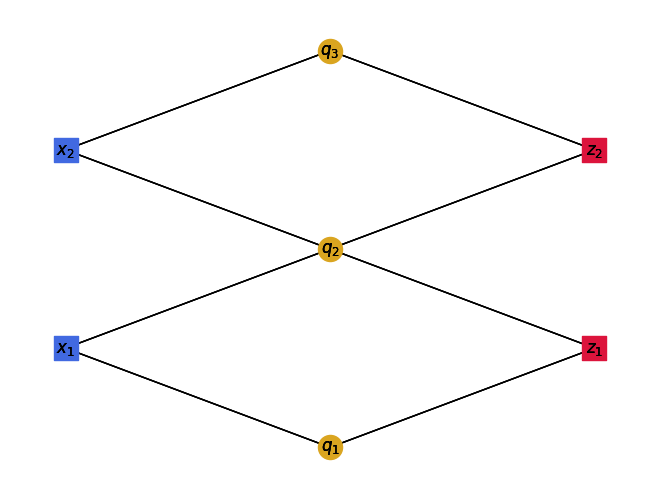

In [17]:
import numpy as np
import networkx as nx
import scipy.sparse as sp
import networkx.algorithms.bipartite as bpt
import matplotlib.pyplot as plt

from basic_css_code import construct_HGP_code

# H = np.array([
# [1, 1, 1, 0, 0, 0],
# [0, 1, 0, 1, 1, 0],
# [1, 0, 0, 1, 0, 1],
# [0, 0, 1, 0, 1, 1],
# ])
H = np.array([
    [1, 1, 0],
    [0, 1, 1]
])
Hx, Hz = construct_HGP_code(H)

G = bpt.from_biadjacency_matrix(sp.csr_array(H))

m, n = H.shape
sp.dok_array(H).keys()
x_labels = lambda c, v: (f'$x_{{{c+1}}}$', f'$q_{{{v+1}}}$')
z_labels = lambda c, v: (f'$z_{{{c+1}}}$', f'$q_{{{v+1}}}$')
x_edges = [x_labels(*e) for e in sp.dok_array(H).keys()]
z_edges = [z_labels(*e) for e in sp.dok_array(H).keys()]
Q = nx.Graph()
q_nodes = [f'$q_{{{v+1}}}$' for v in range(n)]
x_nodes = [f'$x_{{{c+1}}}$' for c in range(m)]
z_nodes = [f'$z_{{{c+1}}}$' for c in range(m)]
Q.add_nodes_from(x_nodes, layer=0)
Q.add_nodes_from(q_nodes, layer=1)
Q.add_nodes_from(z_nodes, layer=2)
Q.add_edges_from(x_edges)
Q.add_edges_from(z_edges)

pos = nx.multipartite_layout(Q, subset_key='layer')
for lbl, p in zip(q_nodes, np.sort([pos[lbl] for lbl in q_nodes], axis=0)):
    pos[lbl] = p
for lbl, p in zip(x_nodes, np.sort([pos[lbl] for lbl in x_nodes], axis=0)):
    pos[lbl] = p
for lbl, p in zip(z_nodes, np.sort([pos[lbl] for lbl in z_nodes], axis=0)):
    pos[lbl] = p

colors = ['darkblue', 'mediumorchid', 'red']

x_nodelist = [v for v, d in Q.nodes(data=True) if d['layer'] == 0]
q_nodelist = [v for v, d in Q.nodes(data=True) if d['layer'] == 1]
z_nodelist = [v for v, d in Q.nodes(data=True) if d['layer'] == 2]

nx.draw(Q, pos, nodelist=x_nodelist, node_color='#4169E1', node_shape='s', with_labels=True, label='X nodes')
nx.draw(Q, pos, nodelist=q_nodelist, node_color='#DAA520', node_shape='o', with_labels=True, label='Q nodes')
nx.draw(Q, pos, nodelist=z_nodelist, node_color='#DC143C', node_shape='s', with_labels=True, label='Z nodes')
plt.show()

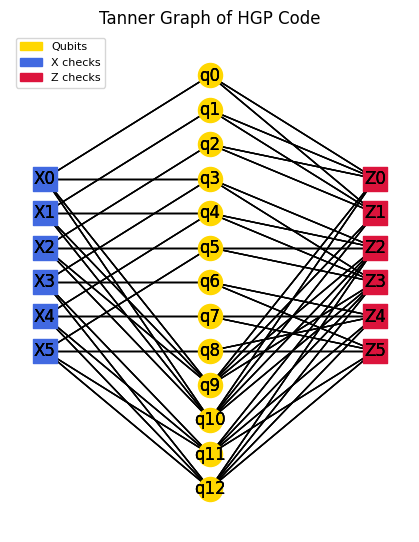

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Build Tanner graph for HGP code
def draw_hgp_tanner_graph(Hx, Hz):
    plt.figure(figsize=(4, 5))
    m_x, n = Hx.shape
    m_z, _ = Hz.shape

    G = nx.Graph()

    # Add qubit nodes
    qubit_nodes = [f'q{i}' for i in range(n)]
    G.add_nodes_from(qubit_nodes, bipartite='qubit')

    # Add X check nodes
    x_nodes = [f'X{i}' for i in range(m_x)]
    G.add_nodes_from(x_nodes, bipartite='X')

    # Add Z check nodes
    z_nodes = [f'Z{i}' for i in range(m_z)]
    G.add_nodes_from(z_nodes, bipartite='Z')

    # Add edges from Hx (X checks)
    Hx = Hx.tocsr()
    for i in range(m_x):
        for j in Hx[i].indices:
            G.add_edge(f'X{i}', f'q{j}')

    # Add edges from Hz (Z checks)
    Hz = Hz.tocsr()
    for i in range(m_z):
        for j in Hz[i].indices:
            G.add_edge(f'Z{i}', f'q{j}')

    # Manual layout with spacing
    pos = {}
    spacing = 0.5  # Adjust as needed

    for layer_name, nodes in [('X', x_nodes), ('Q', qubit_nodes), ('Z', z_nodes)]:
        layer_nodes = sorted(nodes, key=lambda x: int(''.join(filter(str.isdigit, x))))
        for i, node in enumerate(layer_nodes):
            if layer_name == 'X':
                pos[node] = [-1, -1.5 -i * spacing]
            elif layer_name == 'Q':
                pos[node] = [0, -i * spacing]
            else:  # 'Z'
                pos[node] = [1, -1.5 -i * spacing]


    nx.draw(G, pos,
            nodelist=qubit_nodes, node_color='gold', node_shape='o', label='Qubits', with_labels=True)
    nx.draw(G, pos,
            nodelist=x_nodes, node_color='royalblue', node_shape='s', label='X checks', with_labels=True)
    nx.draw(G, pos,
            nodelist=z_nodes, node_color='crimson', node_shape='s', label='Z checks', with_labels=True)

    
    plt.title("Tanner Graph of HGP Code")
    plt.axis('off')
    
    legend_elements = [
        mpatches.Patch(color='gold', label='Qubits'),
        mpatches.Patch(color='royalblue', label='X checks'),
        mpatches.Patch(color='crimson', label='Z checks')
    ]
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, 1), fontsize=8)
    plt.show()

# Call the function
draw_hgp_tanner_graph(Hx, Hz)
